In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from datetime import datetime
%matplotlib widget

-0.11987800151440366
0.5590298035436071
1.9194047120875066
2.015995295275502
3.688236567495212
0.9931814060899428
-1.5202204455243085
-2.337978032154109


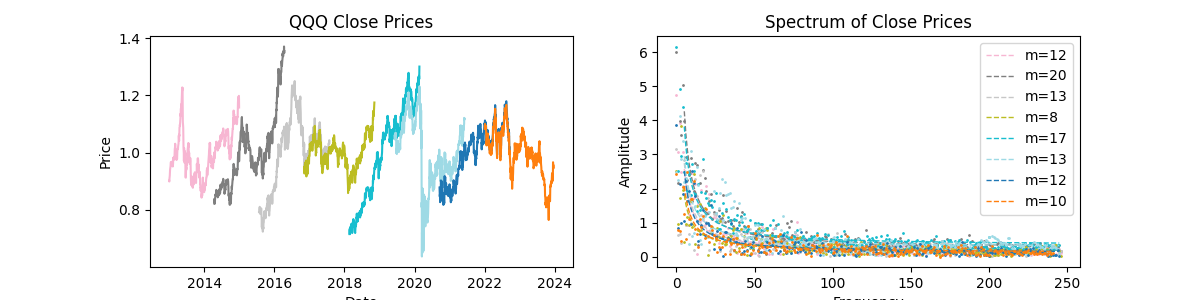

In [39]:
qqq = yf.Ticker("O")

start_dates = pd.date_range(start='2013-01-01', end='2022-01-01', periods=8)

fig, axs = plt.subplots(1, 2, figsize=(12,3))

# axs = [0, axs]

for start_date in start_dates:
    color = plt.cm.tab20(start_date.year % 20)

    start_date = start_date.replace(nanosecond=0)
    end_date = start_date + pd.DateOffset(years=2)

    qqq_data = qqq.history(start=start_date, end=end_date)
    qqq_df = pd.DataFrame(qqq_data)
    close_prices = qqq_df['Close']

    close_prices = close_prices / close_prices.mean()

    axs[0].plot(close_prices, color=color)
    axs[0].set_title('QQQ Close Prices')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Price')

    spectrum = np.fft.fft(close_prices)[10:]
    nyquist_freq = len(spectrum) // 2

    phase = np.angle(spectrum[1])
    print(np.abs(spectrum[1]) * (phase))


    def inverse_shift(x, m, b):
        return m/x + b
    min_freq = 5
    x = np.arange(min_freq, nyquist_freq)
    popt, pcov = curve_fit(inverse_shift, x, np.abs(spectrum[min_freq:nyquist_freq]))
    (m,b) = popt
    y = m/x + b

    axs[1].plot(np.abs(spectrum[:nyquist_freq]), '.', color=color, markersize=2)
    axs[1].plot(x, y, color=color, linestyle='--', label=f"m={round(m)}", linewidth=1)
    axs[1].legend()
    axs[1].set_title('Spectrum of Close Prices')
    axs[1].set_xlabel('Frequency')
    axs[1].set_ylabel('Amplitude')
    # axs[1].set_xscale('log')
    # axs[1].set_yscale('log')


-0.1198902367770629
0.5590338066332377
1.9193897797653339
2.0160007030072506
3.6882391132436285
0.9931879182405727
-1.5202161406360128
-2.337980611978861


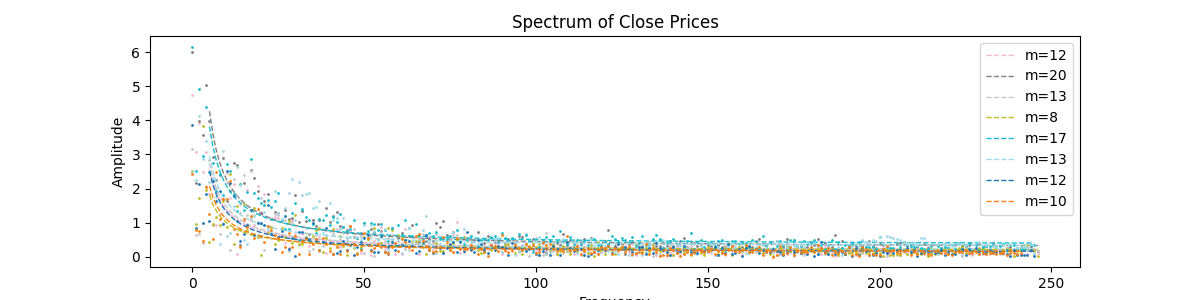

In [40]:
qqq = yf.Ticker("O")

start_dates = pd.date_range(start='2013-01-01', end='2022-01-01', periods=8)

fig, axs = plt.subplots(1, 1, figsize=(12,3))

axs = [0, axs]

for start_date in start_dates:
    color = plt.cm.tab20(start_date.year % 20)

    start_date = start_date.replace(nanosecond=0)
    end_date = start_date + pd.DateOffset(years=2)

    qqq_data = qqq.history(start=start_date, end=end_date)
    qqq_df = pd.DataFrame(qqq_data)
    close_prices = qqq_df['Close']

    close_prices = close_prices / close_prices.mean()

    spectrum = np.fft.fft(close_prices)[10:]
    nyquist_freq = len(spectrum) // 2

    phase = np.angle(spectrum[1])
    print(np.abs(spectrum[1]) * (phase))


    def inverse_shift(x, m, b):
        return m/x + b
    min_freq = 5
    x = np.arange(min_freq, nyquist_freq)
    popt, pcov = curve_fit(inverse_shift, x, np.abs(spectrum[min_freq:nyquist_freq]))
    (m,b) = popt
    y = m/x + b

    axs[1].plot(np.abs(spectrum[:nyquist_freq]), '.', color=color, markersize=2)
    axs[1].plot(x, y, color=color, linestyle='--', label=f"m={round(m)}", linewidth=1)
    axs[1].legend()
    axs[1].set_title('Spectrum of Close Prices')
    axs[1].set_xlabel('Frequency')
    axs[1].set_ylabel('Amplitude')
    # axs[1].set_yscale('log')
    # axs[1].set_xscale('log')
    # axs[1].set_yscale('log')


3.215671739310231
0.3952041896286383
0.8146119828289534
6.80369156766186
2.743148922207576
2.5615961314332636
4.802033131580606
0.33142051358610497


O: Data doesn't exist for startDate = 472366800, endDate = 535438800


ValueError: Invalid number of FFT data points (0) specified.

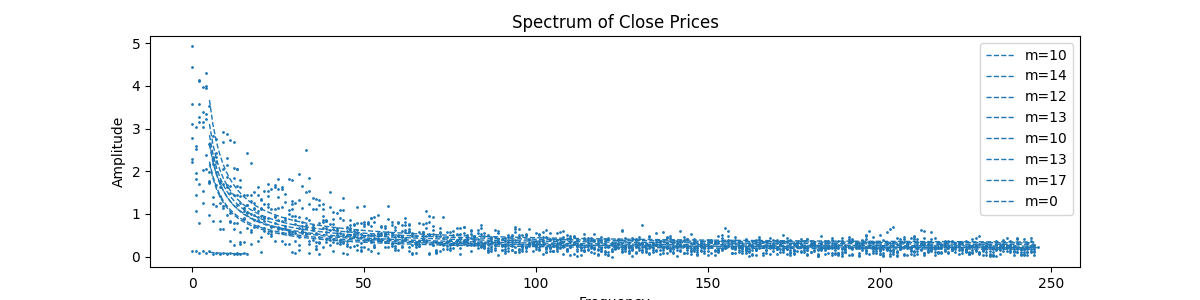

In [46]:
qqq = yf.Ticker("O")

# start_date = 
# start_date = 
end_date = pd.to_datetime("2022-12-20").replace(nanosecond=0)

fig, axs = plt.subplots(1, 1, figsize=(12,3))

axs = [0, axs]

color = plt.cm.tab20(start_date.year % 20)

for i in range(10):
    start_date = end_date - pd.DateOffset(years=2+i)
    end_date = end_date - pd.DateOffset(years=0+i)

    qqq_data = qqq.history(start=start_date, end=end_date)
    qqq_df = pd.DataFrame(qqq_data)
    close_prices = qqq_df['Close']

    close_prices = close_prices / close_prices.mean()

    spectrum = np.fft.fft(close_prices)[10:]
    nyquist_freq = len(spectrum) // 2

    phase = np.angle(spectrum[1])
    print(np.abs(spectrum[1]) * (phase))


    def inverse_shift(x, m, b):
        return m/x + b
    min_freq = 5
    x = np.arange(min_freq, nyquist_freq)
    popt, pcov = curve_fit(inverse_shift, x, np.abs(spectrum[min_freq:nyquist_freq]))
    (m,b) = popt
    y = m/x + b

    axs[1].plot(np.abs(spectrum[:nyquist_freq]), '.', color=color, markersize=2)
    axs[1].plot(x, y, color=color, linestyle='--', label=f"m={round(m)}", linewidth=1)
    axs[1].legend()
    axs[1].set_title('Spectrum of Close Prices')
    axs[1].set_xlabel('Frequency')
    axs[1].set_ylabel('Amplitude')
# axs[1].set_yscale('log')
# axs[1].set_xscale('log')
# axs[1].set_yscale('log')
